# **WARNING** 

### We are dealing with raw web data. Some of the information that is retrieved might contain certain explicit content (words, phrases, or references)

## Exercise 3: App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 
- The app ID. This can be found in the web page for the app right after `id`.
- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

For example, Candy Crush's US webpage is `https://apps.apple.com/us/app/candy-crush-saga/id553834731`, which means that the ID is `553834731`.

### 3.1 English app reviews

Get the reviews for Candy Crush, Tinder, Facebook or Twitter (pick one of these apps along with **ONE** English-speaking country of your choice).

*NOTE - you will have to verify how many pages of data you can get per country, per app* 

### 3.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 3.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import re 
import json
import matplotlib.pyplot as plt

In [2]:
# exercise 3.1


In [3]:
# Let's prepare a dictionary of full API address.
# The addresses are retrieve using a shorter key. 
# short Key format: country code + App Name. Ex: US + CandyCrush => usCandyCrush
# The addresse are from all Apps, All countries.
# The limit of pages per API is 10 pages.

# API URL used:
# https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json


app_dic =  {'553834731':'CandyCrush', '547702041':'Tinder', '284882215':'Facebook', '333903271':'Twitter'}

URL_main = 'https://itunes.apple.com/'
uri_0 = {1:'us', 2:'gb', 3:'ca', 4:'au'}
uri_1 = '/rss/customerreviews/id='
uri_2 = {1:'553834731', 2:'547702041', 3:'284882215', 4:'333903271'}
uri_3 = '/page='
uri_4 = '10' #'Range[1-10]' # US limit: 10 pages | gb Limit: 10 pages | CA limit: 10 pages | au limit: 10 pages 
uri_5 = '/sortby=mostrecent/json'


pack_urls = {}
for i,valuei in uri_0.items():
    for j,valuej in uri_2.items():
        print('country: ', valuei)
        print('App: ', app_dic[valuej])
        
        pages = []
        for page_num in range(1,11):
            uri_4 = str(page_num)
            total_url = URL_main + valuei + uri_1 + valuej + uri_3 + uri_4 + uri_5 
            print(total_url)
            pages.append(total_url)
        id_url = valuei + app_dic[valuej]    
        pack_urls[id_url] = pages
        #print(pages)
#print(pack_urls)        
#print(pd.DataFrame.from_dict(json.loads(requests.get(total_url).content)))





country:  us
App:  CandyCrush
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=1/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=2/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=3/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=4/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=5/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=6/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=7/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=8/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=9/sortby=mostrecent/json
https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=10/sortby=mostrecent/json
country:  us
App:  Tinder
https://itunes.apple.com/us/rss/c

In [4]:
pack_urls


{'usCandyCrush': ['https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=1/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=2/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=3/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=4/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=5/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=6/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=7/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=8/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=9/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=10/sortby=mostrecent/json'],
 'usTinder': ['https:/

In [5]:
# Function to retrieve json data from the given API url

def get_json_data(mini_url, page):
    if page >0:
        page -=1
        
    get_url = pack_urls[mini_url]
    local_req = requests.get(get_url[page])
    js_data = json.loads(local_req.content)
    return js_data


In [6]:
# Function that compiles All ratings from App from All the different countries
# into a dictionary: 
# {'shortUrl1' : {{version:score}, {version:score}, ... 
# 'shortUrl2' : {{version:score}, {version:score}, ...}

def versions_rating(json_data):
    
    versions_rating={}
    counts ={}
    entries = json_data['feed']['entry']
    for entry in entries:
        version = entry['im:version']['label']
        rating = entry['im:rating']['label']
        #print('version:',version,'rating',rating)
        if version in versions_rating.keys():
            versions_rating[version]+= int(rating)
            counts[version]+=1
        else:
            versions_rating[version]=0
            counts[version]=1

    for k,v in versions_rating.items():
        versions_rating[k]=round(versions_rating[k]/counts[k],1)

    return versions_rating


In [21]:
app_ranking = {}
for k in pack_urls.keys():
    print('MiniURL:', k)
    list_page_ratings =[]
    for page in range(1,11):
        data = get_json_data(k,page)
        list_page_ratings.append(versions_rating(data))
    app_ranking[k] = list_page_ratings
app_ranking

MiniURL: usCandyCrush
MiniURL: usTinder
MiniURL: usFacebook
MiniURL: usTwitter
MiniURL: gbCandyCrush
MiniURL: gbTinder
MiniURL: gbFacebook
MiniURL: gbTwitter
MiniURL: caCandyCrush
MiniURL: caTinder
MiniURL: caFacebook
MiniURL: caTwitter
MiniURL: auCandyCrush
MiniURL: auTinder
MiniURL: auFacebook
MiniURL: auTwitter


{'usCandyCrush': [{'1.247.0.2': 2.6, '1.245.1.1': 0.0, '1.246.0.1': 0.0},
  {'1.247.0.2': 2.3, '1.246.0.1': 2.4},
  {'1.246.0.1': 2.6},
  {'1.246.0.1': 2.3, '1.243.0.1': 0.0},
  {'1.246.0.1': 2.3},
  {'1.246.0.1': 2.2},
  {'1.246.0.1': 2.1, '1.245.1.1': 3.1},
  {'1.245.1.1': 2.5},
  {'1.245.1.1': 2.9},
  {'1.245.1.1': 2.2, '1.244.0.1': 2.4}],
 'usTinder': [{'14.4.0': 1.4, '14.3.0': 1.3},
  {'14.3.0': 1.5, '12.23.0': 0.0},
  {'14.3.0': 1.1},
  {'14.3.0': 1.4},
  {'14.3.0': 1.2},
  {'14.3.0': 1.5, '14.2.0': 0.5},
  {'14.2.0': 1.4},
  {'14.2.0': 1.1},
  {'14.2.0': 1.2},
  {'14.2.0': 1.5}],
 'usFacebook': [{'405.1': 1.8, '405.0': 1.7},
  {'405.0': 1.6},
  {'405.0': 1.1, '404.0': 1.5, '403.1': 0.0},
  {'404.0': 1.3},
  {'404.0': 1.5},
  {'404.0': 1.1},
  {'404.0': 1.5},
  {'404.0': 1.2},
  {'404.0': 1.4, '403.1': 1.3},
  {'403.1': 1.3}],
 'usTwitter': [{'9.48': 3.0},
  {'9.48': 3.6, '9.47': 0.0},
  {'9.48': 3.1, '9.47': 0.0},
  {'9.48': 3.1},
  {'9.48': 3.2, '9.47': 1.9},
  {'9.47': 3.5},
 

In [8]:
# 3.2 Best version
# For each app, get the version that is the best rated, per country
# Make a visualization of the ratings per versions per app to show this.

In [30]:
# Returns Dictionary with the version that had the best score
# {'shortUrl1' : {version: Best score}, 'shortUrl2' : {version: Best score}, ...}

def get_best_score(app_ranking):
    apps_versions_bestscore ={}
    for key,value in app_ranking.items():  #key: miniURL / #Value:list of dics
        best_list_score=0
        best_list_version ={}
        for lst_dics in value:
                                #versions_score = app_ranking[key]
            score_ref = 0
            best_version = {}
            for k,v in lst_dics.items():      #versions_score.items():
                if v > score_ref:
                    score_ref = v
                    best_version.clear()
                    best_version[k]=v
            for kk ,vv in best_version.items():
                if best_list_score < best_version.get(kk):
                    best_list_score= best_version[kk]
                    best_list_version.clear()
                    best_list_version[key] = best_version

        apps_versions_bestscore[key]=best_list_version[key]

    return apps_versions_bestscore


            

In [31]:
best_scores = get_best_score(app_ranking)
best_scores

{'usCandyCrush': {'1.245.1.1': 3.1},
 'usTinder': {'14.3.0': 1.5},
 'usFacebook': {'405.1': 1.8},
 'usTwitter': {'9.48': 3.6},
 'gbCandyCrush': {'1.240.0.2': 3.3},
 'gbTinder': {'13.19.0': 2.1},
 'gbFacebook': {'398.0': 2.0},
 'gbTwitter': {'9.46': 3.2},
 'caCandyCrush': {'1.243.0.1': 3.3},
 'caTinder': {'14.1.0': 1.6},
 'caFacebook': {'396.0': 1.7},
 'caTwitter': {'9.39': 3.8},
 'auCandyCrush': {'1.205.0.4': 3.3},
 'auTinder': {'13.17.0': 1.8},
 'auFacebook': {'400.0': 1.7},
 'auTwitter': {'9.43.1': 4.0}}

In [35]:
# Selects the best score from all different countries of a SAME app into a dictionary
# {'App1':{best_version:global_best_score}, 'App2':{best_version:global_best_score}, ...}
    

def global_best_scores(best_scores):
    global_best_scores = {}
    Candy_list = {}
    Tinder_list = {}
    Facebook_list = {}
    Twitter_list = {}

    for k,v in best_scores.items():
        if 'Candy' in k:
            Candy_list.update(v)
        if 'Tinder' in k:
            Tinder_list.update(v)
        if 'Facebook' in k:
            Facebook_list.update(v)
        if 'Twitter' in k:
            Twitter_list.update(v)
    
    global_best_scores.update(get_best_score({'Candy':[Candy_list]}))
    global_best_scores.update(get_best_score({'Tinder':[Tinder_list]}))
    global_best_scores.update(get_best_score({'Facebook':[Facebook_list]}))
    global_best_scores.update(get_best_score({'Twitter':[Candy_list]}))
    
    return global_best_scores

In [36]:
scores = global_best_scores(best_scores)
scores

{'Candy': {'1.240.0.2': 3.3},
 'Tinder': {'13.19.0': 2.1},
 'Facebook': {'398.0': 2.0},
 'Twitter': {'1.240.0.2': 3.3}}

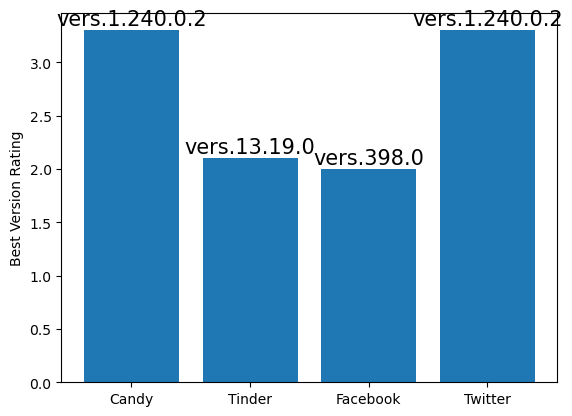

In [38]:

fig,ax = plt.subplots()

app_names = scores.keys()
score_list = [ i for j in scores.values() for i in j.values() ]

plt.bar(app_names, score_list , align = 'center')


for bar in enumerate(ax.patches):
    ax.annotate(format(['vers.'+i for j in scores.values() for i in j.keys()][bar[0]]), #bar.get_height()
                   (bar[1].get_x() + bar[1].get_width() / 2,
                    bar[1].get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')



ax.set_ylabel('Best Version Rating')
#plt.grid()
plt.show()

In [14]:
# 3.3 Top words
# Which word for each app is most common in the 5 star and in the 1-star review's titles?
# Note: df.title.str.get_dummies() is your friend
# Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [39]:
pack_urls


{'usCandyCrush': ['https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=1/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=2/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=3/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=4/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=5/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=6/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=7/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=8/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=9/sortby=mostrecent/json',
  'https://itunes.apple.com/us/rss/customerreviews/id=553834731/page=10/sortby=mostrecent/json'],
 'usTinder': ['https:/

In [40]:
# Returns a tuple of ( words in title where score is 1 , words in title where score is 5 )

def app_title(json_data):
    
    app_titles_1=[]
    app_titles_5=[]
    
    entries = json_data['feed']['entry']
    for entry in entries:
        
        title = entry['title']['label']
        rating = int(entry['im:rating']['label'])
        
        if rating == 1:
            app_titles_1.append((title.split())[0])
        if rating == 5:
            app_titles_5.append((title.split())[0])

    return app_titles_1, app_titles_5

In [41]:
app_titles_1 = []
app_titles_5 = []

good_bad_words_per_app = {}

for k in pack_urls.keys():
    print('MiniURL:', k)
    for page in range(1,11):
        data = get_json_data(k,page)
        get_words = app_title(data)
    
    #app_titles_1.append(get_words[0])
    #app_titles_5.append(get_words[1])
    
    good_bad_words_per_app[k]=get_words[0], get_words[1]

MiniURL: usCandyCrush
MiniURL: usTinder
MiniURL: usFacebook
MiniURL: usTwitter
MiniURL: gbCandyCrush
MiniURL: gbTinder
MiniURL: gbFacebook
MiniURL: gbTwitter
MiniURL: caCandyCrush
MiniURL: caTinder
MiniURL: caFacebook
MiniURL: caTwitter
MiniURL: auCandyCrush
MiniURL: auTinder
MiniURL: auFacebook
MiniURL: auTwitter


In [42]:
good_bad_words_per_app

{'usCandyCrush': (['Game',
   'Addictive!!',
   'Terrible',
   'Made',
   'Gold',
   'Frustrating!',
   '没中文',
   '“Contacting',
   'Stop',
   'Pay',
   'Yea',
   'Bugs',
   'Frustrating',
   'Unethical',
   'Frustrating',
   'Don’t',
   'I',
   'Ads',
   'Just',
   'Stupid',
   '1/2',
   'Ads',
   'App',
   'I'],
  ['Candy',
   'Addicting',
   'The',
   'Shelbert54',
   'Peaceful',
   'Desent',
   'Great',
   'Fun',
   'It’s',
   'Great']),
 'usTinder': (['Account',
   'Kick',
   'Not',
   'Apps',
   'Broken',
   'Banned',
   'Me',
   'Actual',
   'Riddled',
   'Tinder',
   'Garbage',
   'Wack',
   'Trash',
   'Banned',
   'Trash',
   'Full',
   'Banned',
   'Tinder',
   'Scam',
   'Another',
   'Spam',
   'Ridiculous',
   'Banned',
   'Banned',
   'Fake',
   'Active',
   'Banned',
   'Being',
   'Completely',
   'Lame',
   'Men',
   'Owned',
   'Too',
   'I',
   'Don’t',
   'Banned',
   'banned',
   'The',
   'App',
   'My'],
  ['Amazing', 'Tốt', 'tinder', '?', 'Great', 'Good']),
 'u

In [43]:
# compiles in a dictionary of tuple, the words of a SAME app from ALL countries together. 
# Tuple: ( words linked to score 1, words linked to score 5)
# Ex: {'app1':(words_score_1, words_score_5, 'app2':(words_score_1, words_score_5, ...)

import numpy as np

def global_words(good_bad_words_per_app):
    global_words = {}
    Candy_list = [[],[]]
    Tinder_list = [[],[]]
    Facebook_list = [[],[]]
    Twitter_list = [[],[]]

    for k,v in good_bad_words_per_app.items(): # v is a tuple of 2 lists (badwords, goodwords)
        if 'Candy' in k:
            Candy_list[0]+= v[0]
            Candy_list[1]+= v[1]
            
        if 'Tinder' in k:
            Tinder_list[0]+= v[0]
            Tinder_list[1]+= v[1]
            
        if 'Facebook' in k:
            Facebook_list[0] += v[0]
            Facebook_list[1] += v[1]
        
        if 'Twitter' in k:
            Twitter_list[0] += v[0]
            Twitter_list[1] += v[1]
            
       
            
            
  
    global_words.update({'Candy':Candy_list})
    global_words.update({'Tinder':Tinder_list})
    global_words.update({'Facebook':Facebook_list})
    global_words.update({'Twitter':Twitter_list})
    
    return global_words

In [44]:
global_app_words = global_words(good_bad_words_per_app)
global_app_words

{'Candy': [['Game',
   'Addictive!!',
   'Terrible',
   'Made',
   'Gold',
   'Frustrating!',
   '没中文',
   '“Contacting',
   'Stop',
   'Pay',
   'Yea',
   'Bugs',
   'Frustrating',
   'Unethical',
   'Frustrating',
   'Don’t',
   'I',
   'Ads',
   'Just',
   'Stupid',
   '1/2',
   'Ads',
   'App',
   'I',
   'Clearly',
   'Candy',
   'Game',
   'Why',
   'Very',
   'I',
   'Limit',
   'Freezing',
   'STILL',
   'Unable',
   'Lost',
   'Crazy',
   '1',
   'Update',
   'Power',
   'Glitch?',
   'Not',
   'What',
   'July',
   'Useless',
   'Higher',
   'Where',
   'Deleted',
   'Waste',
   'Disappointed',
   'I',
   'Candy',
   'Too',
   'sucks',
   'sooo',
   'Steals',
   'Money',
   'Super',
   'Too',
   'Used',
   'Recent',
   'Level',
   'Not',
   'Another',
   'Worst',
   'Candy',
   'This',
   'Blinding',
   '👎🏼',
   'won’t',
   'Fed',
   'Bug',
   'Reward',
   'App',
   'Issues',
   'Total',
   'Treat',
   'Reinstall',
   'Game',
   'Where',
   'This',
   'Agree',
   'Don’t',
   

In [45]:
# Allocate a variable to each specific list of words: 
# Format : 
# App1_words_score_1
# App1_words_score_5
# App2_words_score_1
# App2_words_score_5


import pandas as pd
for k,v in global_app_words.items():
    if k=='Candy':
        candy_words_score_1 = pd.Series(v[0]).value_counts()
        candy_words_score_5 = pd.Series(v[1]).value_counts()
    if k=='Tinder':
        Tinder_words_score_1 = pd.Series(v[0]).value_counts()
        Tinder_words_score_5 = pd.Series(v[1]).value_counts()
    if k=='Facebook':
        Facebook_words_score_1 = pd.Series(v[0]).value_counts()
        Facebook_words_score_5 = pd.Series(v[1]).value_counts()
    if k=='Twitter':
        Twitter_words_score_1 = pd.Series(v[0]).value_counts()
        Twitter_words_score_5 = pd.Series(v[1]).value_counts()
    

In [46]:
# VISUALISATION
# Now let's put together into a dataframe, 
# all the Two 1st words that are more frequent on the 4 apps,
# for each type of rating 1 and 5

#         App_Score_1   App_Score_5
# Word 1   occurrences  occurrences
# Word 2   occurrences  occurrences


In [47]:
pd.DataFrame({'Candy_1':candy_words_score_1[:2],'Candy_5':candy_words_score_5[:2]})

,Candy_1,Candy_5
Candy,NaN,12.0
Game,3.0,NaN
Great,NaN,4.0
I,4.0,NaN


In [48]:
pd.DataFrame({'Tinder_1':Tinder_words_score_1[:2],'Tinder_5':Tinder_words_score_5[:2]})

,Tinder_1,Tinder_5
Amazing,NaN,1.0
Banned,20.0,NaN
Good,NaN,2.0
Tinder,6.0,NaN


In [49]:
pd.DataFrame({'Facebook_1':Facebook_words_score_1[:2],'Facebook_5':Facebook_words_score_5[:2]})

,Facebook_1,Facebook_5
Facebook,7.0,2.0
No,6.0,NaN
Only,NaN,1.0


In [50]:
pd.DataFrame({'Twitter_1':Twitter_words_score_1[:2],'Twitter_5':Twitter_words_score_5[:2]})

,Twitter_1,Twitter_5
Awful,5.0,NaN
The,NaN,5.0
Twitter,6.0,9.0
